In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from multi_optim import *


In [2]:
mobile_data = pd.read_csv("mobile_data (1).csv",index_col=False)
pixel_density = mobile_data["Pixel Density"].to_numpy()
rating = mobile_data["Rating"].to_numpy()

In [3]:
def J(w):
    data = (w[0]*bias + w[1]*pixel_density-rating)**2
    #print(data)
    return 1/(2*len_pixel[0])*np.sum(data)

def dJ_w1(w):
    data = np.multiply((w[0]*bias + w[1]*pixel_density-rating),bias)
    #print(data)
    return 1/len_pixel[0]*np.sum(data)

def dJ_w2(w):
    data = np.multiply((w[0]*bias + w[1]*pixel_density-rating),pixel_density)
    #print(data)
    #print("\n")
    return 1/len_pixel[0]*np.sum(data)

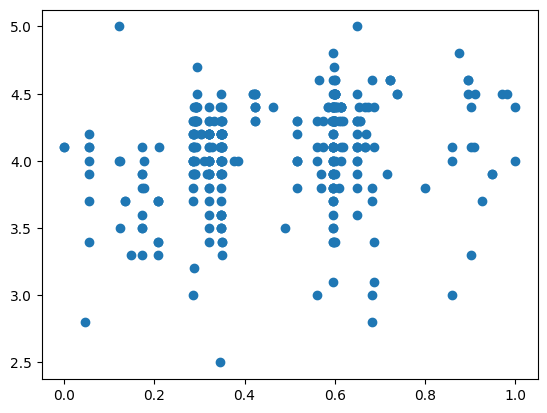

In [4]:
# Normalization
pixel_density = (np.min(pixel_density)-pixel_density)/(np.min(pixel_density)-np.max(pixel_density))
plt.plot(pixel_density,rating,'o')

len_pixel=np.shape(pixel_density)
#len_rating=len(rating)
bias = np.ones(len_pixel)
weight = (2,0)

In [5]:

# rating = weight*bias[matrix made of 1s] + weight*pixel
J1 = Multivariate_Optimization(weight, (1,1), 100)
min_J1, ALPHA = J1.line_search(1000, 0.001, J)
print(ALPHA)
#variables = np.array([bias,pixel_density])
#print(APLHA)
# weights (w0,w1)

tolerance = 0.1

while tolerance < np.linalg.norm(np.array((dJ_w1(weight),dJ_w2(weight)))):
    weight = weight - ALPHA*np.array((dJ_w1(weight),dJ_w2(weight)))
print("Slope and Intercept are ",*weight)
print("Mean squared Error:",J(weight))



1.3013013013013013
Slope and Intercept are  3.6624560607195358 0.6796647706069525
Mean squared Error: 0.07361552499980727


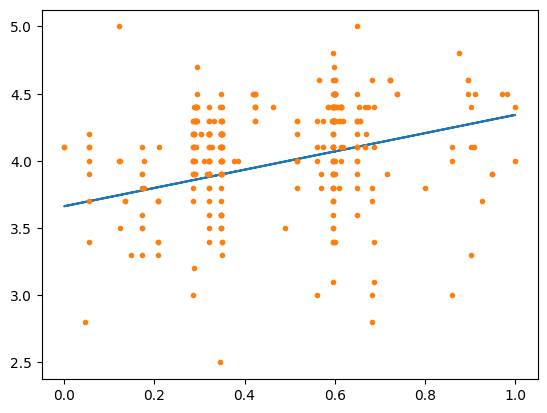

In [6]:
plt.plot(pixel_density,weight[0]*bias + weight[1]*pixel_density)
plt.plot(pixel_density,rating,'.')
plt.show()

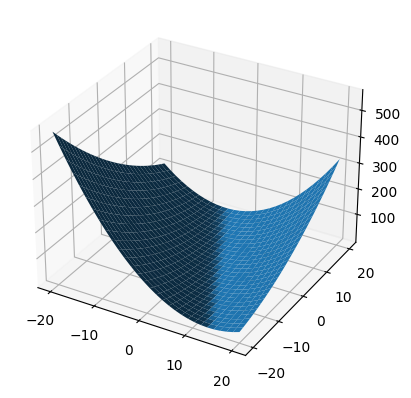

In [7]:

fig=plt.figure()
ax = fig.add_subplot(111,projection="3d")
w0 = np.linspace(-20,20,30)
w1 = np.linspace(-20,20,30)
w0, w1 = np.meshgrid(w0, w1)
#print(w0,w1)
data=[]

for i in range(np.shape(w0)[0]):
    data1=[]
    for j in range(np.shape(w0)[1]):
        data1+=[J([w0[i][j],w1[i][j]])]
    data+=[np.array(data1)]

ax.plot_surface(w0,w1,np.array(data))
plt.show()

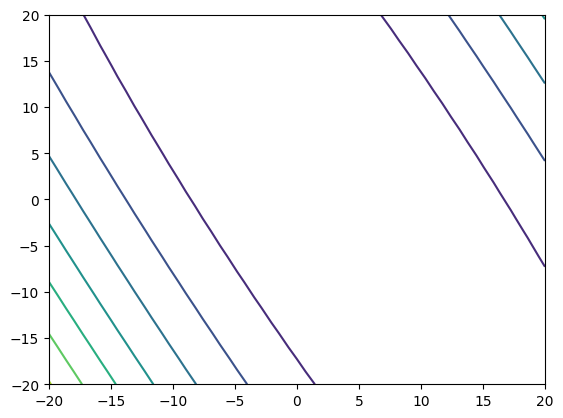

In [8]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.contour(w0,w1,np.array(data))
plt.show()